In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


In [2]:
data= np.load('/home/irene/github/ctools/notebooks/examples/Evt54.iterations.noMoon.thresh10.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
events = list(data.keys())
sites = list(data[events[0]].keys())


In [3]:
custom_lines = [Line2D([0], [0], color='red', lw=4, alpha=0.3),
                Line2D([0], [0], color='yellow', lw=4,alpha=0.3),
                Line2D([0], [0], color='green', lw=4,alpha=0.3),
                Line2D([0], [0], marker='o', color='red',
                          markerfacecolor='red', markersize=5),
                Line2D([0], [0], marker='o', color='g',
                          markerfacecolor='g', markersize=5)]

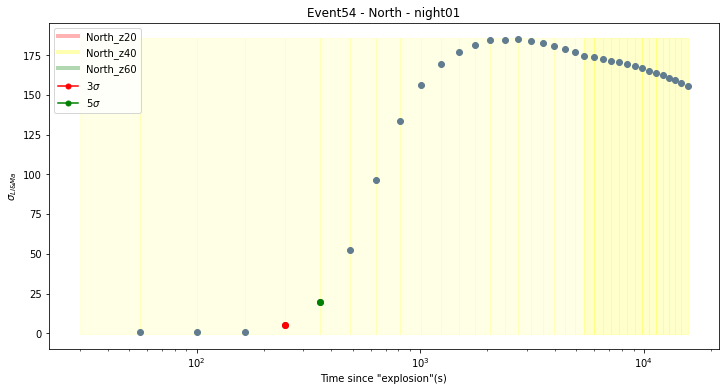

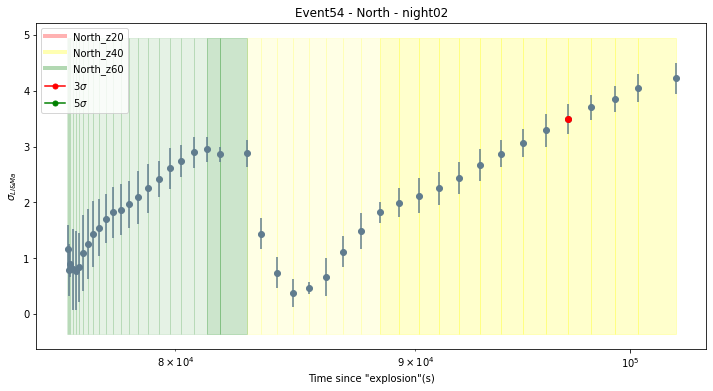

In [4]:
for event in events:
    for site in sites:
        for night in data[event][site]:
            color_min = min(data[event][site][night]['significance']) - max(data[event][site][night]['variance'])
            color_max = max(data[event][site][night]['significance']) + max(data[event][site][night]['variance'])
            fig, axes = plt.subplots(1 ,figsize=(12,6))
            for i in range(len(data[event][site][night]['irf'])):
                t_start= data[event][site][night]['t_start'][i]
                t_stop = data[event][site][night]['t_stop'][i]
                if data[event][site][night]['irf'][i].endswith('0.5h'):
                    a=0.1
                elif data[event][site][night]['irf'][i].endswith('5h'):
                    a= 0.2
                elif data[event][site][night]['irf'][i].endswith('50h'):
                    a=0.3

                if 'z20' in data[event][site][night]['irf'][i]:
                    axes.fill_between([t_start,t_stop], color_min, color_max, color='red', alpha=a, 
                                      label=f'IRF z20')
                elif 'z40' in data[event][site][night]['irf'][i]:
                    axes.fill_between([t_start,t_stop], color_min, color_max, color='yellow', alpha=a, 
                                      label='IRF z40')
                elif 'z60' in data[event][site][night]['irf'][i]:
                    axes.fill_between([t_start,t_stop], color_min, color_max, color='green', alpha=a,
                                      label='IRF z60')

            axes.errorbar (data[event][site][night]['t_stop'], data[event][site][night]['significance'], 
                           yerr= data[event][site][night]['variance'], color='#607c8e',fmt='o')
            if '3sigma' in data[event][site][night].keys():
                axes.errorbar (data[event][site][night]['3sigma'][0], data[event][site][night]['3sigma'][1], 
                               color='red',fmt='o')
            if '5sigma' in data[event][site][night].keys():
                axes.errorbar (data[event][site][night]['5sigma'][0], data[event][site][night]['5sigma'][1], 
                               color='g',fmt='o')
            axes.set_xlabel(r'Time since "explosion"(s)')
            axes.set_ylabel(r'$\sigma_{Li&Ma}$')
            axes.set_xscale('log')
            axes.legend(custom_lines, ['North_z20', 'North_z40', 'North_z60',r'$3\sigma$', r'$5\sigma$'])
            axes.set_title(f'{event} - {site} - {night}')
                    



plt.show()


The Event reported here has been simulated only 3 times, these results are preliminary
